In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import sys
sys.path.append("../../..")
from utils import utils, postprocessing_utils as post
from utils.plotting_utils import plots

In [36]:
def make_plot(task, short_model_name, metric, fit_reg=False, exclude_reg=[]):
    params = {
        "results_dir": "../../../results/",
        "experiment": "acl",
        "short_model_name": short_model_name,
        "task": task,
        "metric": metric
    }

    M = post.Metrics(**params)
    df = M.cross_over_score()
    stats_path = "../../../data_exploration/acl/tables/basic_stats_{}_{}.xlsx".format(task, short_model_name)
    df = utils.merge_tables(df, pd.read_excel(stats_path), how="left", cols_table2=["test_avg_tokens"])
    df = df.rename(columns={"test_avg_tokens": "Average-Example-Length"})
    df.loc[:, "Cross-Over-Score"] *= 100
    
    plots.scatter(x="Average-Example-Length", 
                  y="Cross-Over-Score",
                  data=df,
                  xaxis_title="Avg Test Length (tokens)",
                  yaxis_title="Avg Cross Over Score",
                  title=(task + " " + short_model_name).upper(),
                  fit_reg=fit_reg,
                  exclude_reg=exclude_reg)
    print(pearsonr(x=df["Average-Example-Length"], y=df["Cross-Over-Score"]))

# PoS

In [29]:
task = "pos"
metric = "Accuracy"

(-0.20791432196471235, 0.3930260867026525)


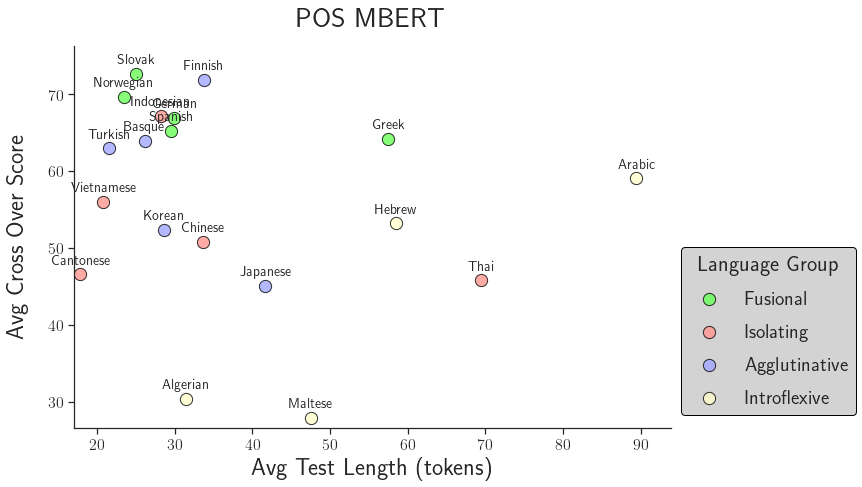

In [30]:
short_model_name = "mbert"
make_plot(task, short_model_name, metric)
plt.savefig("../../../results/acl/{}/plots/length_vs_score_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")

(-0.3765953345437719, 0.11200224051807414)


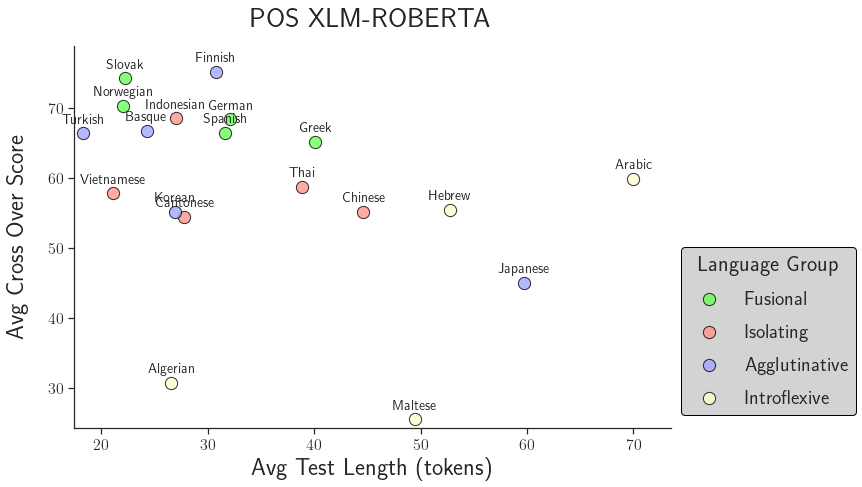

In [31]:
short_model_name = "xlm-roberta"
make_plot(task, short_model_name, metric)
plt.savefig("../../../results/acl/{}/plots/length_vs_score_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")

# Sentiment

In [32]:
task = "sentiment"
metric = "Macro_F1"

(-0.49537072406777777, 0.031033423419874324)


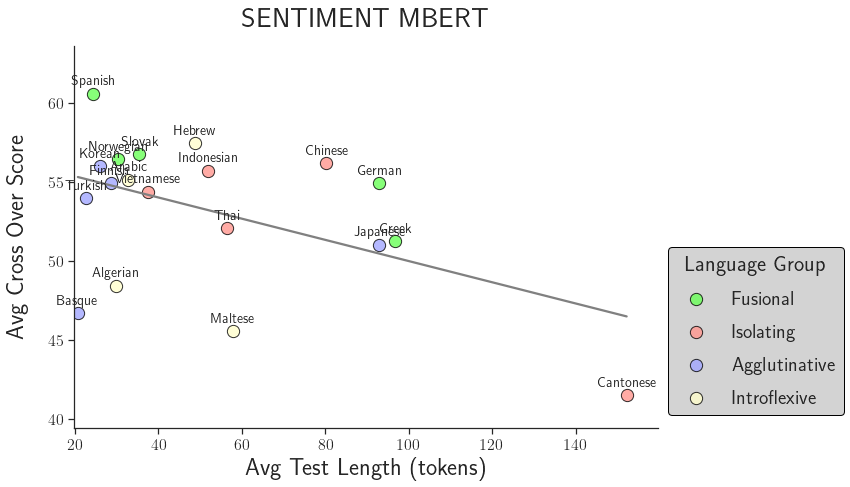

In [38]:
short_model_name = "mbert"
make_plot(task, short_model_name, metric, fit_reg=True)
plt.savefig("../../../results/acl/{}/plots/length_vs_score_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")

(-0.1496635345931671, 0.5408422052888595)


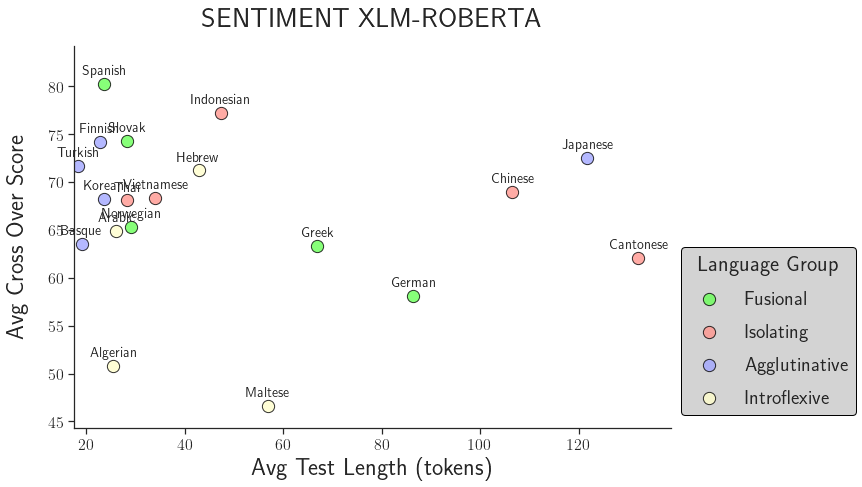

In [40]:
short_model_name = "xlm-roberta"
make_plot(task, short_model_name, metric)
plt.savefig("../../../results/acl/{}/plots/length_vs_score_{}.pdf".format(short_model_name, task), dpi=400, bbox_inches="tight")